# **HW5**

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, ifftshift
from scipy import ndimage
# from numpy.fft import fft2, ifft2

Download required images to the colab working directory

In [ ]:
!gdown --id 1DQMYDbPtok6sJZ-fnSu_OVVnpIewSRA1
!gdown --id 1nClhFhBCOwxC_bhYKiQpFpzQAl0rCET_
!gdown --id 14zOA1aCwo4lneA1jETn8OdSmGe266amB
!gdown --id 1IQy-fVFDkdZI9RCcua-9bT_8YS-geP4T
!gdown --id 1azZXKMuWvn0CVIqdQlPJ0A63kEE0lX01
!gdown --id 1WRPll2Wjb1CpShlnnmjuWcsh5HR6-a4-

Downloading...
From: https://drive.google.com/uc?id=1DQMYDbPtok6sJZ-fnSu_OVVnpIewSRA1
To: /content/image1.jpg
100% 94.8k/94.8k [00:00<00:00, 51.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nClhFhBCOwxC_bhYKiQpFpzQAl0rCET_
To: /content/h.bmp
100% 343k/343k [00:00<00:00, 48.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=14zOA1aCwo4lneA1jETn8OdSmGe266amB
To: /content/image2.jpg
100% 98.7k/98.7k [00:00<00:00, 27.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IQy-fVFDkdZI9RCcua-9bT_8YS-geP4T
To: /content/image3.jpg
100% 8.40k/8.40k [00:00<00:00, 18.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1azZXKMuWvn0CVIqdQlPJ0A63kEE0lX01
To: /content/image4.bmp
100% 30.1k/30.1k [00:00<00:00, 25.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WRPll2Wjb1CpShlnnmjuWcsh5HR6-a4-
To: /content/image5.jpg
100% 13.5k/13.5k [00:00<00:00, 7.70MB/s]


Q1

In [38]:
def image_restoration(img,h):
  '''
  perform image restoration

  inputs :
    img (ndarray): input RGB image
    h (ndarray) : Binary image of camera movement
  outputs :
    output (ndarray) : restored image
  '''
  output = np.zeros_like(img)
  ####################

  (red, green, blue) = cv.split(img)
  T_blue=fft2(blue)
  T_red= fft2(red)
  T_green=fft2(green)
  t2 = fft2(h)

  T2 = ((np.conj(t2) * t2) / (t2 * ((np.conj(t2) * t2) + 50)))

  output_blue = ifft2(T_blue * T2).real
  output_red = ifft2(T_red * T2).real
  output_green = ifft2(T_green * T2).real

  shift_blue = ifftshift(output_blue)
  shift_red = ifftshift(output_red)
  shift_green = ifftshift(output_green)


  rgbArray2 = cv.merge((shift_red,shift_green, shift_blue))
  out=np.round((rgbArray2 - np.min(rgbArray2)) / (np.max(rgbArray2) - np.min(rgbArray2)))

  # end of your code
  ####################

  return out

**don't change next cell (run for test)**

Text(0.5, 1.0, 'restored image')

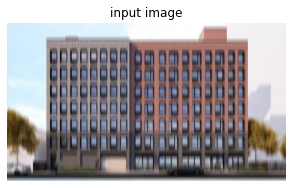

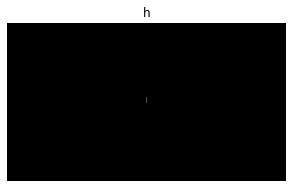

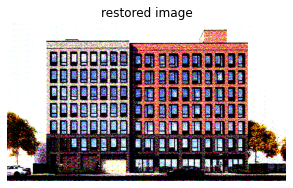

In [39]:
img = cv.imread('image1.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
h = cv.imread('h.bmp')
h = cv.cvtColor(h,cv.COLOR_BGR2GRAY)
output = image_restoration(img,h)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(5,5))
plt.imshow(h,cmap='gray')
plt.axis('off')
plt.title('h')
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.axis('off')
plt.title('restored image')

Q2-part2

In [57]:
def smoothing(img):
  '''
  perform image smoothing
  you can use libraries here

  inputs :
    img (ndarray): input Grayscale image
    
  outputs :
    output (ndarray) : smoothed image
  '''

  ####################
  # start of your code
  output =  cv.GaussianBlur(img,(3,3),0)
  # end of your code
  ####################
  return output

In [62]:

def comput_gradient(img):

  '''
  compute image gradiend magnitude and angle
  you can use libraries here

  inputs :
    img (ndarray): input Grayscale image
    
  outputs :
    mag (ndarray) : gradient magnitude
    angle (ndarray) : gradient angle
  '''
  mag = np.zeros_like(img)
  angle = np.zeros_like(img)
  ####################
  # start of your code

  # compute gradients along the x and y axis, respectively
  gX = cv.Sobel(img, cv.CV_64F, 1, 0)
  gY = cv.Sobel(img, cv.CV_64F, 0, 1)
  # compute the gradient magnitude and orientation
  magnitude = np.sqrt((gX ** 2) + (gY ** 2))
  mag = np.round(magnitude).astype(int)
  mag1 =  np.gradient(img)
  angle = cv.phase(mag1[0] , mag1[1] , angleInDegrees = True)
  # end of your code
  ####################
  

  return mag , angle

In [67]:
def NMS(mag,angle):
  '''
  perform non-maximum suppression
  **you should Not use libraries here**

  inputs :
    mag (ndarray) : gradient magnitude
    angle (ndarray) : gradient angle
    
  outputs :
    output (ndarray) : one-pixel width edges
  '''
  output = mag.copy()
  ####################
  # start of your code
  for i in range(len(angle)):
    for j in range(len(angle[0])):
      if 67.5 < angle[i][j] <= 112.5 :
        angle[i][j] = 90
      elif  22.5 < angle[i][j] <= 67.5:
        angle[i][j] = 45
      elif  0 <= angle[i][j] <= 22.5:
        angle[i][j] = 0
      elif  337.5 < angle[i][j] <= 360:
        angle[i][j] = 0
      elif  292.5 < angle[i][j] <= 337.4:
        angle[i][j] = 315 
      elif  247.5 < angle[i][j] <= 293.5:
        angle[i][j] = 270
      elif  202.5 < angle[i][j] <= 247.5:
        angle[i][j] = 225 
      elif  157.5 < angle[i][j] <= 202.5:
        angle[i][j] = 180 
      elif  112.5 < angle[i][j] <= 157.5:
        angle[i][j] = 135  


  for k1 in range(1,len(mag)-1):
    for k2 in range(1 , len(mag[0])-1):
      if angle[k1][k2] == 0  or angle[k1][k2] == 180 :
        if mag[k1][k2] >= mag[k1][k2+1] and mag[k1][k2] >= mag[k1][k2-1]:
         continue
        else:
           mag[k1][k2] = 0 
       
      if angle[k1][k2] == 45  or angle[k1][k2] == 225 :
        if mag[k1][k2] >= mag[k1-1][k2+1] and mag[k1][k2] >= mag[k1+1][k2-1]:
          continue
        else:
           mag[k1][k2] = 0 


      if angle[k1][k2] == 90  or angle[k1][k2] == 270 :
        if mag[k1][k2] >= mag[k1-1][k2] and mag[k1][k2] >= mag[k1+1][k2]:
          continue
        else:
           mag[k1][k2] = 0 


      if angle[k1][k2] == 135  or angle[k1][k2] == 315 :
        if mag[k1][k2] >= mag[k1-1][k2-1] and mag[k1][k2] >= mag[k1+1][k2+1]:
          continue
        else:
           mag[k1][k2] = 0


  # end of your code
  ####################

  return mag

In [50]:
def hysteresis_threshold(edges,min_th,max_th):
  '''
  perform two-steps threshold
  **you should Not use libraries here**

  inputs :
    edges (ndarray) : edges of image
    min_th (int) : weak threshold
    max_th (int) : strong threshold
    
  outputs :
    output (ndarray) : final edge image
  '''
   
  output = edges.copy()
  ####################
  # start of your code
  flag = [[ 0 for i in range(len(edges[1]))] for j in range(len(edges))]
  for i in range(0 , len(edges)):
    for j in range(0, len(edges[0])):
      if edges[i][j] >= max_th:
        flag[i][j] = 1
      

  for i in range(1 , len(edges)-1):
    for j in range(1 , len(edges[0])-1):        
      if flag[i][j]==1:
        for k in range(-1,2):
          for l in range(-1,2):
            if edges[i+k][j+l] >= min_th:
              flag[i+k][j+l] = 1 
  for i in range(1 , len(edges)-1):
    for j in range(1 , len(edges[0])-1):        
      if flag[i][j]==1:
        for k in range(-1,2):
          for l in range(-1,2):
            if edges[i+k][j+l] >= min_th:
              flag[i+k][j+l] = 1 




  for i in range(0 , len(edges)):
    for j in range(0, len(edges[0])):
      if flag[i][j] == 0:
        edges[i][j] = 0
      if  edges[i][j]>=255:
        edges[i][j] = 255


   
        
  

        
         
  

  # end of your code
  ####################

  return edges

In [51]:
def canny(img,min_th = 40,max_th=50):
  smooth_img = smoothing(img)
  mag,angle = comput_gradient(smooth_img)
  edges = NMS(mag,angle)
  final_edges = hysteresis_threshold(edges,min_th,max_th)
  return final_edges

In [52]:
def openCV_Canny(img,min_th,max_th):
  '''
  use opencv to get canny edges
  
  inputs:
    img (ndarray): input grayscale image
    min_th (int) : weak threshold
    max_th (int) : strong threshold
  outputs:
    cv2_canny (ndarray) : final edges

  '''

  cv2_canny = np.zeros_like(img)
  ####################
  # start of your code

  cv2_canny = cv.Canny(img,min_th,max_th)
  # end of your code
  ####################


  return cv2_canny

**don't change next cell (run for test)**

Text(0.5, 1.0, 'OpenCV Canny')

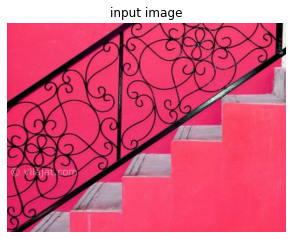

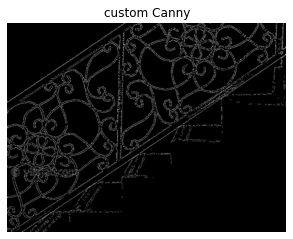

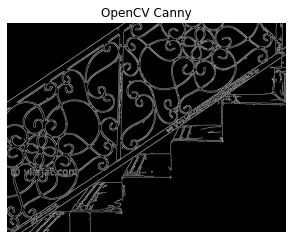

In [68]:
img = img = cv.imread('image2.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
image_g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
min_th,max_th = 30,100
edges = canny(image_g,min_th,max_th)
edges_opencv = openCV_Canny(image_g,min_th,max_th)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('input image')
plt.figure(figsize=(5,5))
plt.imshow(edges, cmap = 'gray')
plt.axis('off')
plt.title('custom Canny')
plt.figure(figsize=(5,5))
plt.imshow(edges_opencv,cmap='gray')
plt.axis('off')
plt.title('OpenCV Canny')

Q3-part2

In [ ]:
# compute proper number of iterations
iterations = 0
import random 
from math import sqrt
def circle_RANSAC(edges):
  '''
  modify RANSAC algorithm to find two circles params
  **you should NOT use libraries here**
  
  inputs:
    edges (ndarray): edges of image
    
  outputs:
    X0s (list) : x location of centers(center of circle)
    Y0s (list) : y location of centers(center of circle)
    rs (list) : raduis of circles

  '''
  global iterations
  x0s = [0 , 0]
  y0s = [0 , 0]
  rs = [0 , 0]
  ####################
  # start of your code
  listofdots = []


  for i in range(len(edges)):
    for j in range(len(edges[0])):
      if edges[i][j] > 50:
        listofdots.append((i , j ))
  max = 0
  maxprim = 0
  threshold = 10
  for k1 in range(24):
    a  = random.choice(listofdots)
    y =  random.choice(listofdots)
    u =  random.choice(listofdots)
    if a != u and a!=y and u != y:
    
    
      dpp = [[]for l in range(24)]
      x1 = a[0]
      x2 = y[0]
      x3 = u[0]
      y1 = a[1]
      y2 = y[1]
      y3 = u[1]

      x12 = x1 - x2
      x13 = x1 - x3
 
      y12 = y1 - y2
      y13 = y1 - y3
 
      y31 = y3 - y1
      y21 = y2 - y1
 
      x31 = x3 - x1
      x21 = x2 - x1
      sx13 = np.power(a[0], 2) - np.power(u[0], 2) 
      sy13 = np.power(a[1], 2) - np.power(u[1], 2)
      sx21 = np.power(y[0], 2) - np.power(a[0], 2)
      sy21 = np.power(y[1], 2) - np.power(a[1], 2)

      f = (((sx13) * (x12) + (sy13) *
		    (x12) + (sx21) * (x13) +
		    (sy21) * (x13)) // (2 *
		    ((y31) * (x12) - (y21) * (x13))));
			
      g = (((sx13) * (y12) + (sy13) * (y12) +
		    (sx21) * (y13) + (sy21) * (y13)) //
		    (2 * ((x31) * (y12) - (x21) * (y13))));

      c = (-pow(x1, 2) - pow(y1, 2) -
		    2 * g * x1 - 2 * f * y1);

	# eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
	# where centre is (h = -g, k = -f) and
	# radius r as r^2 = h^2 + k^2 - c
      h = -g;
      k = -f;
      sqr_of_r = h * h + k * k - c;

	# r is the radius
      r = round(sqrt(sqr_of_r), 5);
      num = 0 
      for i in range(len(listofdots)):
        d = (listofdots[i][0] - h) ** 2 + (listofdots[i][1]- k ) **2  - ( r **2)        
        if  -threshold <= d <= threshold :
          num = num + 1
          dpp[k1].append(listofdots[i])


      if num>= max :
          max = num
          x0s[0] = int(k)
          y0s[0] = int(h)
          rs[0] = int(r)
          diff = [x for x in listofdots if x not in dpp[k1]]





  for k2 in range(24):

    b1 =  random.choice(diff)
    b2=  random.choice(diff)
    b3 =  random.choice(diff)
    if b1 != b2 and b2!=b3 and b1!= b3:

      x1prim = b1[0]
      x2prim = b2[0]
      x3prim = b3[0]
      y1prim = b1[1]
      y2prim = b2[1]
      y3prim = b3[1]



      x12prim = x1prim - x2prim
      x13prim = x1prim - x3prim

      y12prim = y1prim - y2prim
      y13prim = y1prim - y3prim
 
      y31prim = y3prim - y1prim
      y21prim = y2prim - y1prim
 
      x31prim = x3prim - x1prim
      x21prim = x2prim - x1prim


      sx13prim = np.power(x1prim, 2) - np.power(x3prim, 2);
      sy13prim = np.power(y1prim, 2) - np.power(y3prim, 2);
      sx21prim = np.power(x2prim, 2) - np.power(x1prim, 2);
      sy21prim = np.power(y2prim, 2) - np.power(y1prim, 2);


      fprim = (((sx13prim) * (x12prim) + (sy13prim) *
		    (x12prim) + (sx21prim) * (x13prim) +
		    (sy21prim) * (x13prim)) // (2 *
		    ((y31prim) * (x12prim) - (y21prim) * (x13prim))));
			
      gprim = (((sx13prim) * (y12prim) + (sy13prim) * (y12prim) +
		    (sx21prim) * (y13prim) + (sy21prim) * (y13prim)) //
		    (2 * ((x31prim) * (y12prim) - (x21prim) * (y13prim))));

      cprim = (-pow(x1prim, 2) - pow(y1prim, 2) -
		    2 * gprim * x1prim - 2 * fprim * y1prim);


      hprim = -gprim;
      kprim = -fprim;
      sqr_of_rprim = hprim * hprim + kprim * kprim - cprim;



	# r is the radius
      rprim = round(sqrt(sqr_of_rprim), 5);

      numprim = 0

      for i in range(len(diff)):
        dprim = (diff[i][0] - hprim) ** 2 + (diff[i][1]- kprim ) **2  - ( rprim **2)        
        if  -threshold <= dprim <= threshold :
          numprim = numprim + 1
          


      if numprim>= maxprim :
          maxprim = numprim
          x0s[1] = int(kprim)
          y0s[1] = int(hprim)
          rs[1] = int(rprim)
        
    






  # end of your code
  ####################

  return x0s,y0s,rs


**don't change next cell (run for test)**

Text(0.5, 1.0, 'RANSAC circles')

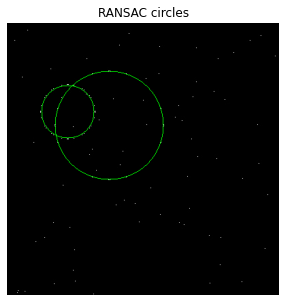

In [ ]:
img = cv.imread('image3.jpg')
img_g = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
Xs,Ys,rs = circle_RANSAC(img_g)
for i in range(len(Xs)):
  cv.circle(img,(Xs[i],Ys[i]),rs[i],(0,255,0),1)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title('RANSAC circles') 

Q4-part3

In [74]:
def opencv_houghCircles(img):
    '''
    use hough transform to find circle location
    **you should NOT use libraries here**

    inputs:
    img (ndarray): input RGB image

    outputs:
    output (ndarray): outout image which is input image with green lines on circles

    '''
    
    output = np.zeros_like(img)
    ####################
    # start of your code
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50 ,param1=100, param2=20,minRadius=0, maxRadius=0)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(img, center, 1, (0, 255, 0), 4)
            # circle outline
            radius = i[2]
            cv.circle(img, center, radius, (0, 0, 255), 3)
    # end of your code
    ####################
    output = img

    return output

**don't change next cell (run for test)**

Text(0.5, 1.0, 'OpenCV hough circles')

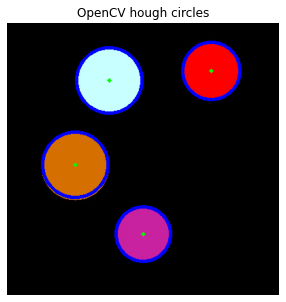

In [75]:
img = cv.imread('image5.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
output = opencv_houghCircles(img)
plt.figure(figsize=(5,5))
plt.imshow(output)
plt.axis('off')
plt.title('OpenCV hough circles') 